In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_54340a4989114e0d80d810b14ec12b38 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vZE_vig6plNf2BLPLWk4o2WIWQX3sj0yl-_VAWhkR2C4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_54340a4989114e0d80d810b14ec12b38.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-hgbai5oi45fyih',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

In [6]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 10-19 Years                34
Thinness 5-9 Years                  34
Income Composition of Resources    167
Schooling                          163
dtype: int64

In [7]:
data.fillna(value = data.mean(), inplace = True)
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 10-19 Years               0
Thinness 5-9 Years                 0
Income Composition of Resources    0
Schooling                          0
dtype: int64

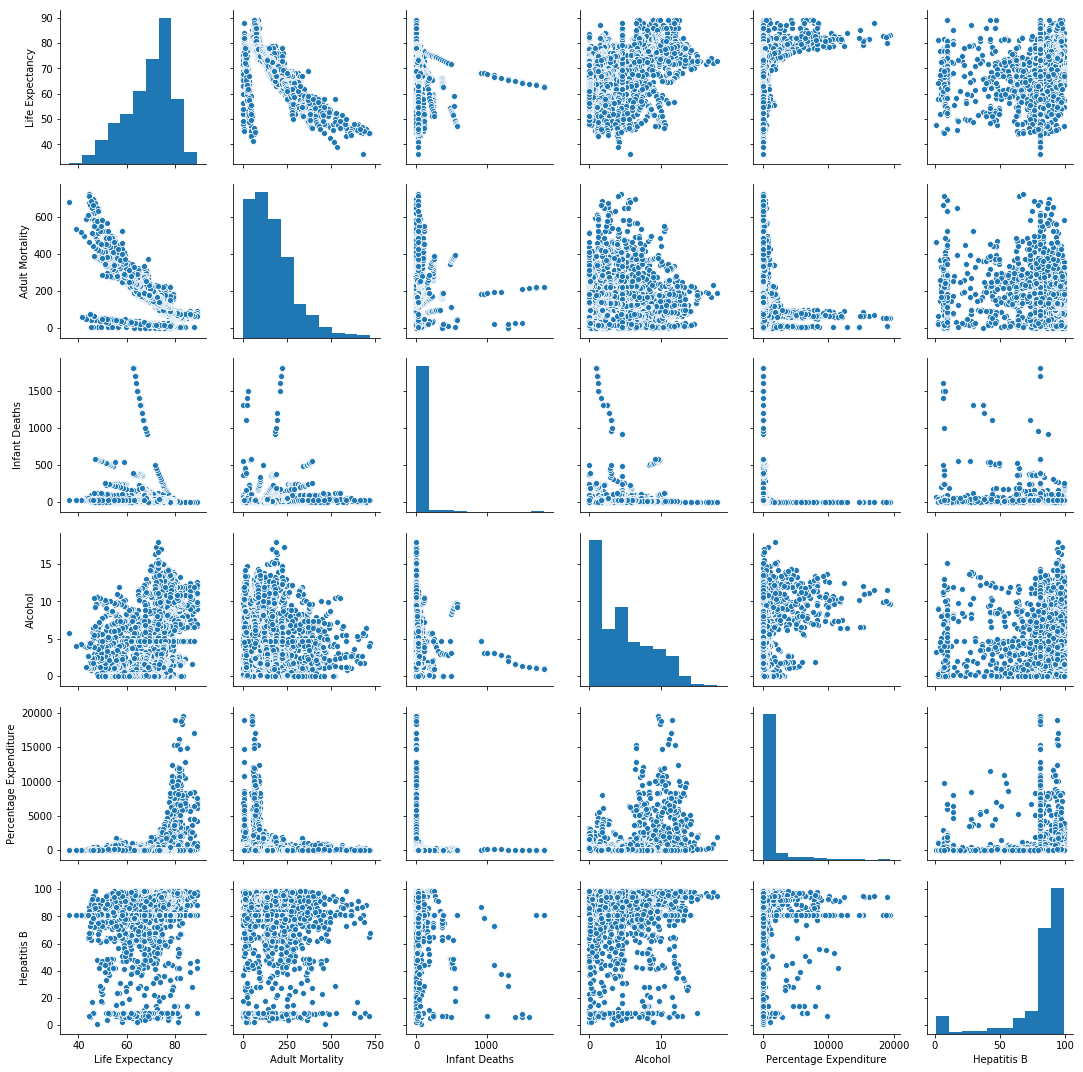

In [29]:
sns.pairplot(data, vars = ['Life Expectancy','Adult Mortality','Infant Deaths','Alcohol','Percentage Expenditure','Hepatitis B'])

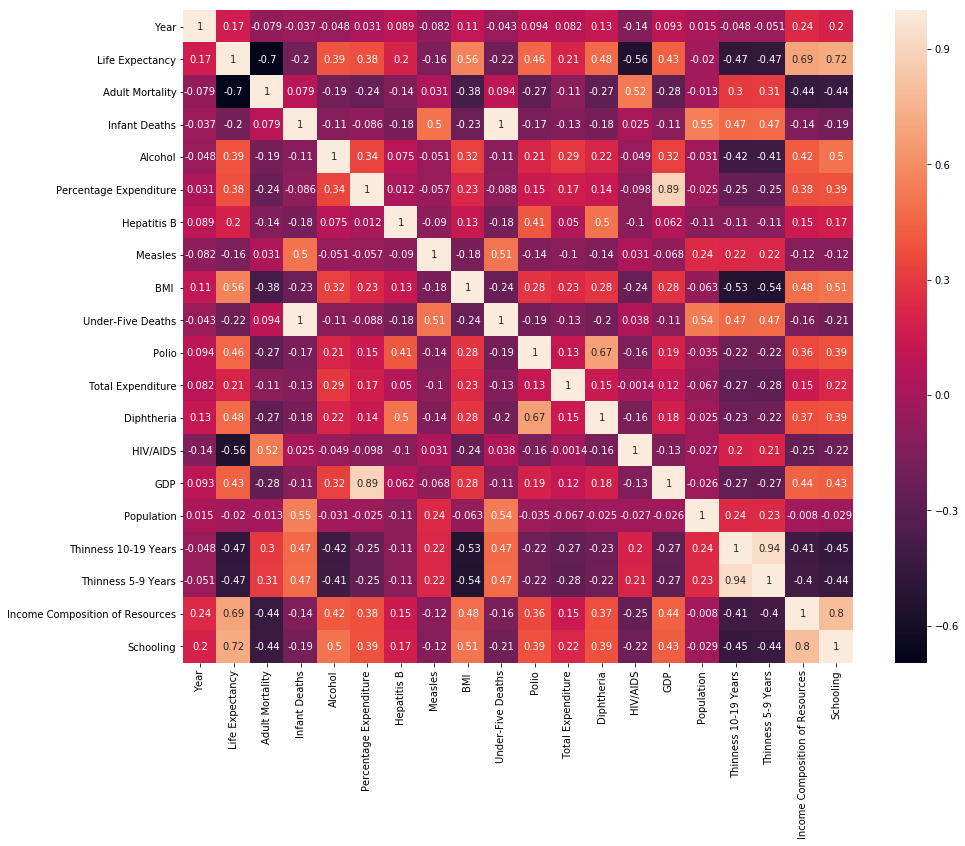

In [24]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(),annot =True)

In [31]:
factors = data.drop('Life Expectancy', axis = 1)
lexp = data['Life Expectancy']

In [32]:
factors.head()

,Country,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
lexp.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life Expectancy, dtype: float64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
factors['Status'] = le.fit_transform(factors['Status'])
factors['Country'] = le.fit_transform(factors['Country'])
factors.head()

,Country,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [35]:
from sklearn.model_selection import train_test_split
factors_train, factors_test, lexp_train, lexp_test = train_test_split(factors, lexp, test_size=0.20, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(factors_train, lexp_train)

lexp_pred = lr.predict(factors_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(lexp_test, lexp_pred)
mse = mean_squared_error(lexp_test, lexp_pred)
rmse = np.sqrt(mse)
r2 = r2_score(lexp_test, lexp_pred)

print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)
print("R2 Score = ",r2)

Mean Absolute Error =  2.9245119418283596
Mean Squared Error =  15.133556519549103
Root Mean Squared Error =  3.89018720880488
R2 Score =  0.8249259717334797


In [37]:
lexp.size

2938

In [38]:
factors.size

61698

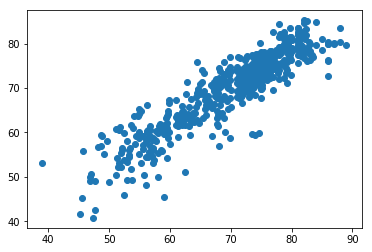

In [39]:
plt.scatter(lexp_test,lexp_pred)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200, random_state=0)
rfr.fit(factors_train, lexp_train)
lexp_pr = rfr.predict(factors_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(lexp_test, lexp_pr)
mse = mean_squared_error(lexp_test, lexp_pr)
rmse = np.sqrt(mse)
r2 = r2_score(lexp_test, lexp_pr)

print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)
print("R2 Score = ",r2)

Mean Absolute Error =  1.0643686700773205
Mean Squared Error =  3.0350831670669836
Root Mean Squared Error =  1.742149008284591
R2 Score =  0.9648883436292108


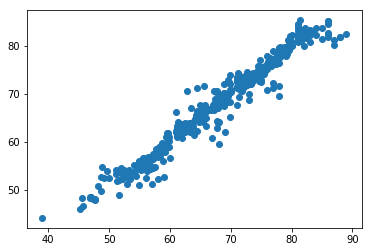

In [41]:
plt.scatter(lexp_test,lexp_pr)

In [231]:
!pip install watson-machine-learning-client

In [232]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [233]:
wml_credentials={
  "apikey": "dPO8xhjNWiYIZ7BBIrdx_t5Rbv9uIe3wL3Lt4rXq79IC",
  "instance_id": "28e34c25-9ae3-486f-bdd5-99f79703734f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [234]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [235]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Saksham Shrivastava", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "sakshamshri99@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy Prediction"}

In [236]:
model_artifact =client.repository.store_model(rfr, meta_props=model_props)

In [237]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [238]:
published_model_uid

'd3724d39-adf2-4481-9f5d-42be482cbff2'

In [239]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'd3724d39-adf2-4481-9f5d-42be482cbff2' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e5cc688c-fac5-42b9-979b-7b475d375f7a'
------------------------------------------------------------------------------------------------




In [240]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [241]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/28e34c25-9ae3-486f-bdd5-99f79703734f/deployments/e5cc688c-fac5-42b9-979b-7b475d375f7a/online'